# Vehicle Dynamics 
## Sensors
 <figure>
 <img src="images/Fahrzeugsensoren.png" width="340" alt="Combined Image" />
</figure>


* **Steering-Angle**: In which direction does the driver want to drive?
* **Yaw-rate**: The degrees per second, which the car turns on vertical axis
* **Lateral-acceleration**: How much lateral acceleration is generated through the turn?
* **Velocity**: Which speed are we driving?

## Dynamics
The whole calculation for the physical vehicle behavior is based on the so called “bicycle-model”, which reduces the car to just one lane and with center of gravity in the height of the ground.
<figure>
 <img src="images/Einspurmodell.png" width="340" alt="Combined Image" />
</figure>
Bicycle model of a car with $\delta$=steering angle, $m$=mass of the car, $R$=radius of the turn, $\dot{\psi}$=yaw rate.
<br>
Assume the radius $R$ is much larger than the wheelbase $(l_{h}+l_{v})$, than the steering angle can calculated with: <br>

$\delta_{A}=\frac{l}{R}$ <br> which is also known as the **Ackermann steering angle**.


## Static Circle-Drive 
The most important driving maneuver in order to specify the vehicle dynamics is the static circle-drive. This means the driven speed and circle radius is static (constant) and the vehicle drives around it. The angle, which has to be steered with, can calculated with:
<br>
$\delta(a_{y})=\frac{l}{R}+EG\cdot a_{y}$

If the EG is a negative value, the steering angle will have to be reduced with increasing speed, because of the oversteering behavior of the vehicle. You can calculate the EG of the vehicle by change over the equation.
<br>

$EG=\frac{\delta\cdot R-l}{a_{y}\cdot R}$


### Estimation of current R 
Since you don't know the radius of the driven circle. We can use the following formulas to calculate a radius.
* $R_{\psi}=\frac{v}{\dot{\psi}}$ 
* $R_{a_y}=\frac{v^{2}}{a_{y}} $
* $R_{rpm} = \frac{v_x*b}{\delta v}= \frac{(v_l+v_r)*b}{2*(v_l-v_r)}$
* $R_{\delta}= \frac{l}{\sin\left(\frac{\delta}{ig}\right)}$

## Understeering / Oversteering

The EG is an important parameter in order to calculate the static yaw gain of the vehicle.

$\left(\frac{\dot{\psi}}{\delta}\right)_{\textrm{stat}}=\frac{v}{l+EG\cdot v^{2}}$

The static yaw gain increases with increasing speed. For **understeering** vehicles the yaw gain increases until the speed reaches the characteristic speed <br>$v_{\textrm{char}}=\sqrt{\frac{l}{|EG|}}$, <br>then it decreases. For **oversteering** cars, the static yaw gain reaches an infinite value, which means the car does swing off.

## Evaluation Vehicle Dynamics
### Reading data from csv



In [1]:
import pandas as pd
# Read data from csv as dataframe (panda container)
import pandas as pd

df = pd.read_csv('data/vehicle_data.csv')

# plot first five rows
df.head()

%time  field.header.seq   field.header.stamp  \
0  1550236425179948984              1732  1550236425176686954   
1  1550236425220247568              1733  1550236425226938077   
2  1550236425280742267              1734  1550236425276346482   
3  1550236425331172114              1735  1550236425327195334   
4  1550236425381681051              1736  1550236425377031198   

  field.header.frame_id  field.yaw_rate  field.velocity  field.long_acc  \
0            bmw_i3_ego        0.003054             0.0           -0.05   
1            bmw_i3_ego        0.000349             0.0           -0.05   
2            bmw_i3_ego        0.000175             0.0           -0.07   
3            bmw_i3_ego        0.000960             0.0           -0.05   
4            bmw_i3_ego        0.000960             0.0           -0.05   

   field.lat_acc  field.ver_acc  field.throttle_position       ...         \
0         -0.026            0.0                      0.0       ...          
1          0.014            0.0                      0.0       ...          
2         -0.066            0.0                      0.0       ...          
3          0.014            0.0                      0.0       ...          
4          0.014            0.0                      0.0       ...          

   field.wheel_speed_fl  field.wheel_speed_bl  field.wheel_speed_br  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   0.0   
2                   0.0                   0.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   0.0   

   field.wheel_speed_fr  field.curve_lat_a  field.curve_yaw  \
0                   0.0      -1.420631e-09          0.01737   
1                   0.0       2.000000e+03          0.01737   
2                   0.0      -6.000000e+03          0.01737   
3                   0.0      -6.000000e+03          0.01737   
4                   0.0      -6.000000e+03          0.01737   

   field.curve_wheel_spd  field.curve_steer_angle  field.inclination_sensor  \
0                    0.0                 0.550429                      1.70   
1                    0.0                 0.550429                      1.68   
2                    0.0                 0.550429                      1.67   
3                    0.0                 0.550586                      1.66   
4                    0.0                 0.550586                      1.65   

   field.gui_color  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  

[5 rows x 29 columns]

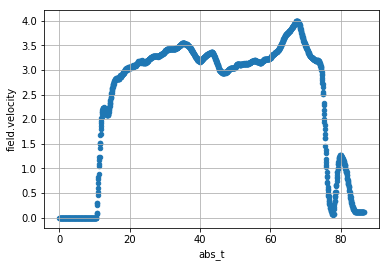

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

# Calculation of our timestep
df['delta_t'] = df['%time'].diff().fillna(0).values * 10**(-9)

# Cummulate delta t to final time 
df['abs_t'] = np.cumsum(df['%time'].diff().fillna(0).values * 10**(-9))
# plot velocity over time
df.plot.scatter(x='abs_t', y='field.velocity',grid =True)


### Constant Position (CP)

$x = (x y)^T$ and the transition equation $x_{k+1} = x_k$
### Constant Velocity (CV)
Two variants:
* two velocity components 
* velocity $v$ and heading $\theta$ components <br>
$  \text{x} = (x,y,\theta, v)^T $ <br>
the state transition is defined as follows:
<br>
$x_{k+1} = x_k +\left \{
\begin{array}{c}
v*\cos(\theta)*T_k \\\
v*\sin(\theta)*T_k \\\
0 \\\
0
\end{array}
\right \}
$


In [3]:
## ** SOME HELPER FUNCTIONS **

# Define state transition equation
# Since we have no information about out current heading - we assume a heading = 0
def cv_equation (v,theta,t):
    return np.array([v*np.cos(theta)*t, v*np.sin(theta)*t,0,0])

def cv_model(row,state,heading='head_steering'):
    
    x = state[0]
    y = state[1]
    v = row['field.velocity']
    t = row['delta_t']
    theta = row[heading] * np.pi/180.
    next_state = state + cv_equation(v,theta,t)
    next_state = np.array(next_state)
    return next_state

# You only need to call the "calc_abs_position" function 
def calc_abs_position(df,heading ='head_steering'):
    state = np.zeros([len(df),4])
    for index,row in df.iterrows():
        if index !=0:
            state[index,:] = cv_model(row,state[index-1,:],heading = heading)
    return state





In [4]:
df['non_heading'] = np.zeros(len(df))
df.head()
state = calc_abs_position(df,heading='non_heading')

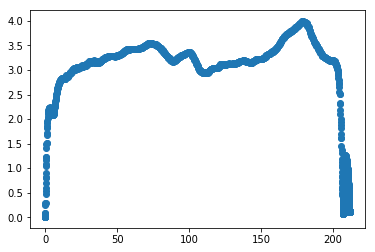

In [6]:
s = state[:,0]
v = df['field.velocity'].values
plt.scatter(s,v)

In [9]:
print('Gesamtweg : ', s[-1])

Gesamtweg :  211.586717294


Text(0.5,1,'Velocity over s  ')

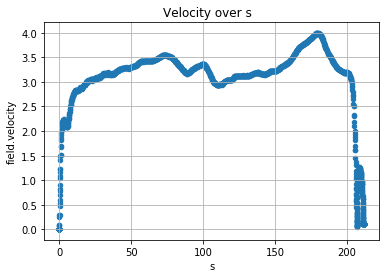

In [10]:
# calc sum of distance and visualize velocity over s 
df['s'] = state[:,0]

df.plot.scatter(x='s', y='field.velocity', grid = True)
title = 'Velocity over s  '
plt.title(title)

### Calculate the Driving diection from the wheel speed
The curving $\kappa$ represents the change of the driving direction as a function of the distance. <br>
$ R = \frac{1}{\kappa}$
#### Curving from wheel speed
Hereby we are using the relative difference between the wheel velocities $\delta v$, the velocity from the non driven axle $v_x $ and the axle width (gauge) $b$. <br>
$\kappa = \frac{\delta v}{v_x*b}= \frac{(v_l-v_r)}{\frac{(v_l+v_r)*b}{2}}$


In [12]:
import re

head = df.columns.values
wheel = re.compile('wheel_speed')
for ind, val in enumerate (head):
    if wheel.search(val):
        print(ind)

19
20
21
22


Text(0.5,1,' Wheel speed over distance ')

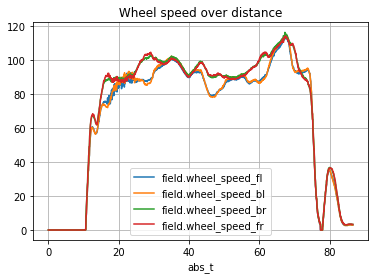

In [13]:
# Example of using reg ex , search pattern
import re
head = df.columns.values
wheel = re.compile('wheel_speed')

# for ind, val in enumerate (head):
#     if wheel.search(val):
#         head[ind]

# short notation of for loops 
T = [head[ind]  for ind, val in enumerate (head) if wheel.search(val)] 

df.plot(x ='abs_t' , y =T , grid = True)
plt.title(' Wheel speed over distance ')

In [16]:
# Extract data from df
fl = df['field.wheel_speed_fl'].values
fr = df['field.wheel_speed_fr'].values
bl = df['field.wheel_speed_bl'].values
br = df['field.wheel_speed_br'].values
s = df['s'].values

# Define vehicle paramters
B = 1.46  #axle width
delta_v = br-bl 
vx = (fl+fr)/2. # non driven axle 

# Calculation of curving - avoid div by zero !
nz_idx = np.where((vx > 0.01) & (abs(delta_v)>1))[0]
curve = np.zeros(len(vx))

for i in nz_idx:
    curve[i]= delta_v[i]/vx[i]/B


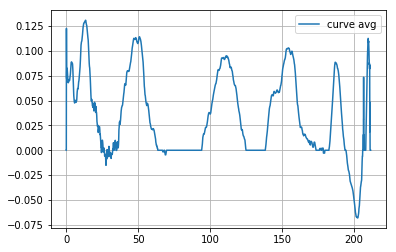

In [17]:
# Extract data from df
fl = df['field.wheel_speed_fl'].values
fr = df['field.wheel_speed_fr'].values
bl = df['field.wheel_speed_bl'].values
br = df['field.wheel_speed_br'].values
s = df['s'].values

# Define vehicle paramters
B = 1.46  #axle width
delta_v = br-bl 
vx = (fl+fr)/2. # non driven axle 

# Calculation of curving - avoid div by zero !
nz_idx = np.where((vx > 0.01) & (abs(delta_v)>1))[0]
curve = np.zeros(len(vx))

for i in nz_idx:
    curve[i]= delta_v[i]/vx[i]/B

    
# Plot curving over distance 
fig, ax1 = plt.subplots()
plt.grid(True)

# Compute moving averages using convolution with different window sizes
window = 5
avg_mask = np.ones(window)/window 
curve_avg = np.convolve(curve,avg_mask,'same')
curve  = curve_avg
# Plot curve with average mean in existing window
ax1.plot(s,curve, label = 'curve avg')
ax1.legend()

#curve = np.cumsum(curve)

In [18]:
## Numerical Integration to calc heading 
def calc_heading(curve,s):
    asum = 0
    ghead = np.zeros(len(curve))
    lasta,lasts = 0,0
    # Place code here ....
    for index,val in enumerate(zip(curve, s)):
        if index==0:
            asum = val[0]*val[1]/2
        else:
            asum += lasta*(val[1]-lasts)+(val[0]-lasta)*(val[1]-lasts)/2.
#             print(asum)
        ghead[index] = asum
        lasta,lasts = val[0],val[1]
    ghead = ghead*180/np.pi
    return ghead


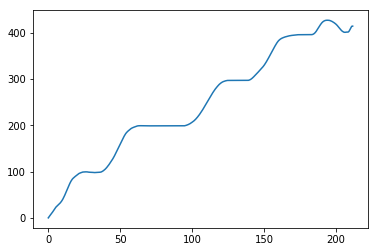

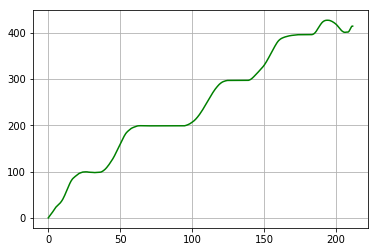

In [19]:
s = df['s'].values
ghead = calc_heading(curve,s)

plt.plot(s,ghead)

# Cast local heading to data frame 
df['head_wheel_speed'] = pd.Series(ghead)

#ghead = np.trapz(np.array([angle,s]),axis=0)
fig, ax3 = plt.subplots()  
ax3.plot(s,ghead,c = 'g' ,label='y_norm')
plt.grid(True)

(-55.717492011173988,
 15.474863235780694,
 -20.211974941345741,
 43.105759808730063)

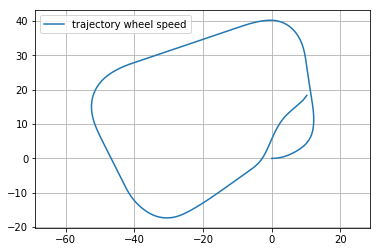

In [20]:
state = calc_abs_position(df,heading='head_wheel_speed')

# Plot trajectory
plt.plot(state[:,0], state[:,1],label='trajectory wheel speed' )
plt.grid(True)
plt.legend()
plt.axis('equal')
#df.plot(x='x_pred',y= 'y_pred')


### Curving from Steering angle 

$R_{\delta}= \frac{l}{\sin\left(\frac{\delta}{ig}\right)}$

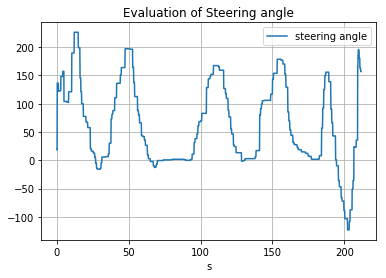

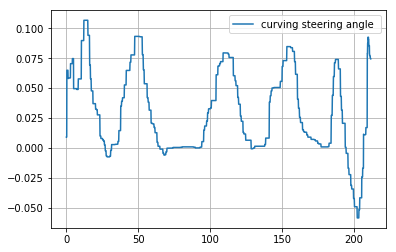

In [21]:
#print(df.columns.values)

l = 2.570
ig = 14.2
df.plot(x = 's', y= 'field.steering_angle', label='steering angle')
plt.legend()
plt.grid(True)
plt.title('Evaluation of Steering angle')
s = df['s'].values

def curve_from_steering(row):
    # place your code here
    a = row['field.steering_angle']*np.pi/180
    return np.sin(a/ig)/l
    #Reference https://www.physicsforums.com/threads/steering-wheel-angle-radius-of-curvature.59881/

# Apply function to dataframe    
curve = df.apply(curve_from_steering, axis =1).values
fig, ax2  = plt.subplots()
plt.plot(s,curve, label='curving steering angle ')
plt.legend()
plt.grid(True)


Text(0.5,1,'Heading from Steering Angle ')

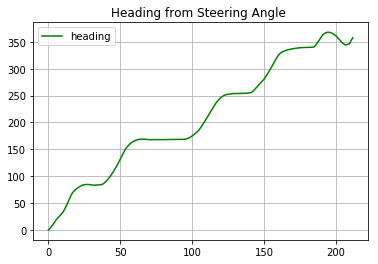

In [22]:
ghead = calc_heading(curve,s)
# Cast local heading to data frame 
df['head_steering'] = pd.Series(ghead)
#ghead = np.trapz(np.array([angle,s]),axis=0)
fig, ax3 = plt.subplots()  
ax3.plot(s,ghead,c = 'g' ,label='heading')
plt.grid(True)
plt.legend()
plt.title('Heading from Steering Angle ')


(-61.140491915783343,
 20.377306791552222,
 -8.1421220713897178,
 55.474577725462559)

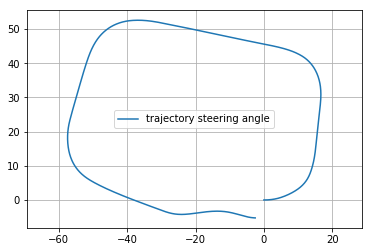

In [23]:
state = calc_abs_position(df,heading ='head_steering')

# Plot trajectory
plt.plot(state[:,0], state[:,1],label='trajectory steering angle' )
plt.grid(True)
plt.legend()
plt.axis('equal')
#df.plot(x='x_pred',y= 'y_pred')


### Bestimmen des Kurvenwinkels auf Basis der Drehrate

$\kappa_{ay}=\frac{\psi}{v_x}$

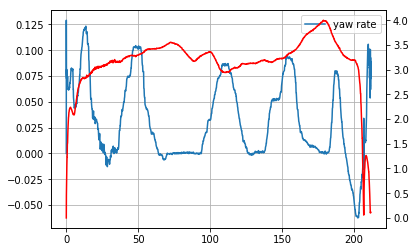

In [27]:
v = df['field.velocity'].values
yaw_rate = df['field.yaw_rate'].values
lastcurve = 0
curve  = np.zeros(len(v))

for i in range(len(v)):
   # Place your code here
    if v[i]>0 :
        curve[i]=yaw_rate[i]/v[i]     
    else:
        pass
# Plot results 
fig, ax1 = plt.subplots()
ax1.plot(s, curve,label= 'yaw rate')

plt.legend()
plt.grid(True)

ax2 = ax1.twinx()
ax2.plot(s,v,c = 'r',label= 'velocity')

Text(0.5,1,'Heading from Yaw Rate ')

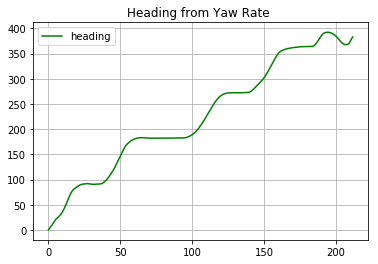

In [28]:
ghead = calc_heading(curve,s)
# Cast local heading to data frame 
df['head_yawrate'] = pd.Series(ghead)
#ghead = np.trapz(np.array([angle,s]),axis=0)
fig, ax3 = plt.subplots()  
ax3.plot(s,ghead,c = 'g' ,label='heading')
plt.grid(True)
plt.legend()
plt.title('Heading from Yaw Rate ')

(-57.488875752103425,
 16.592154356599313,
 -10.478574120650523,
 44.878868816784617)

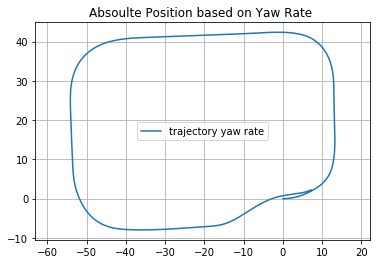

In [29]:
state = calc_abs_position(df, heading ='head_yawrate')
# Plot trajectory

plt.plot(state[:,0], state[:,1],label='trajectory yaw rate' )
plt.grid(True)
plt.title('Absoulte Position based on Yaw Rate ')
plt.legend()
plt.axis('equal')

### Calculate Heading from lateral acceleration 
$\kappa_{ay}=\frac{a_y}{v^2_x}$


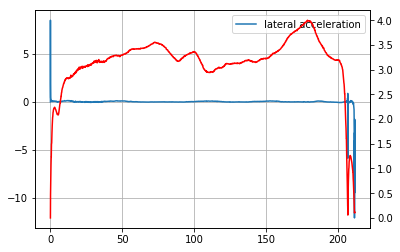

In [31]:
v = df['field.velocity'].values
lat_acc = df['field.lat_acc'].values
lastcurve = 0
curve  = np.zeros(len(v))

for i in range(len(v)):
    #palce your code here
    if v[i]>0:
        curve[i] = lat_acc[i]/v[i]**2    
# Plot results 
fig, ax1 = plt.subplots()
ax1.plot(s, curve,label= 'lateral acceleration')

plt.legend()
plt.grid(True)

ax2 = ax1.twinx()
ax2.plot(s,v,c = 'r',label= 'velocity')

Text(0.5,1,'Heading from Lateral Acceleration ')

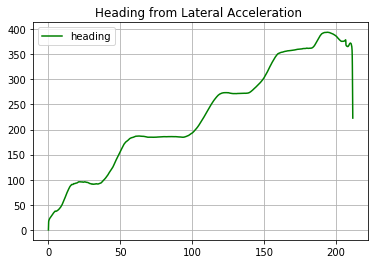

In [32]:
ghead = calc_heading(curve,s)
# Cast local heading to data frame 
df['head_lat_acc'] = pd.Series(ghead)
#ghead = np.trapz(np.array([angle,s]),axis=0)
fig, ax3 = plt.subplots()  
ax3.plot(s,ghead,c = 'g' ,label='heading')
plt.grid(True)
plt.legend()
plt.title('Heading from Lateral Acceleration ')

(-61.792970486693093,
 12.984749704439979,
 -13.052469400651944,
 46.530317308762079)

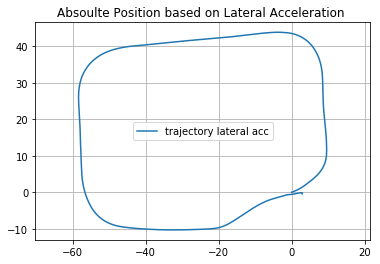

In [33]:
state = calc_abs_position(df, heading ='head_lat_acc')
# Plot trajectory

plt.plot(state[:,0], state[:,1],label='trajectory lateral acc' )
plt.grid(True)
plt.title('Absoulte Position based on Lateral Acceleration ')
plt.legend()
plt.axis('equal')

## Conclusion 
<figure>
 <img src="images/Vergleich_Kruemmungsbestimmung.png" width="560" alt="Combined Image"
      title = "Vergleich Kruemmungsbestimmung [Quelle: Winner]"/>
</figure>
